In [22]:
# first we need to import require module 
import numpy as np 
# numpy use for scientific computing

import matplotlib.pyplot as plt 
# matplotlib use for create graph and visualize your results

import pandas as pd 
# pandas use for read dataset , create dataframe and handling the data

from scipy import stats 
# scipy use for statistical computing

from sklearn.utils import resample 
# sklearn.utils use for  resample arrays or sparse matrices in a consistent way

import seaborn as sns 
# seaborn use for making statistical graphics

In [23]:
# read loan dataset and sp500 
# note : data file have not same path you need to add specific path
loan_csv = pd.read_csv('D:\practical-statistics-for-data-scientists-master\practical-statistics-for-data-scientists-master\data\loans_income.csv',squeeze=True)
sp500_csv = pd.read_csv('D:\practical-statistics-for-data-scientists-master\practical-statistics-for-data-scientists-master\data\sp500_sectors.csv',squeeze=True)
#print(loan_csv.max())

In [24]:
# sampling and distribution of statistics 
sample_data = pd.DataFrame({'income':loan_csv.sample(1000),'type':'data'})
sample_mean_05 = pd.DataFrame({'income':[loan_csv.sample(5).mean() for _ in range(1000)], 'type':'mean_of_05'})
sample_mean_20 = pd.DataFrame({'income':[loan_csv.sample(20).mean() for _ in range(1000)],'type':'mean_of_20'})
results = pd.concat([sample_data,sample_mean_05,sample_mean_20])
# concat function is Concatenate pandas objects along a particular axis with optional set logic along the other axes.
print(results.head())

""" 
    firstly create sample data (use dataframe function) from import csv data eg.(loan_csv or sp500_csv), we find mean of sample(5) from 
    sample import csv data and we also find mean of sample(20) finally we create 'results' object to combine above 3 conditions 
    (use pandas concat funtion) and we will show  'results'.

"""


        income  type
4469   35000.0  data
120    80000.0  data
7520   45849.0  data
24124  86000.0  data
29520  83682.0  data


" \n    firstly create sample data (use dataframe function) from import csv data eg.(loan_csv or sp500_csv), we find mean of sample(5) from \n    sample import csv data and we also find mean of sample(20) finally we create 'results' object to combine above 3 conditions \n    (use pandas concat funtion) and we will show  'results'.\n\n"

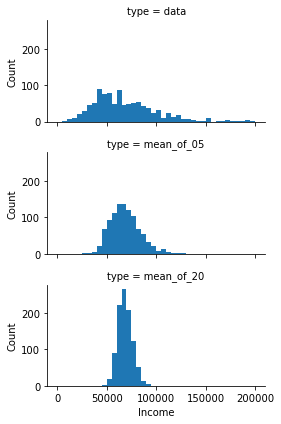

"\n    use seaborn to create graph, firstly create a object to create facetgrid, seaborn's FacetGrid function take 5 arguments\n    we will assign and use map function and than assign (hist,col_name,data_range,bins) and add labels and then we will show \n    the results.\n"

In [25]:
# draw graph
data_graph = sns.FacetGrid(results,col='type',col_wrap=1,height=2,aspect=2)
# facetgrid use for Multi-plot grid for plotting conditional relationships

data_graph.map(plt.hist,'income',range=[0,200000],bins=40)
data_graph.set_axis_labels('Income','Count')
#data_graph.set_titles({'col_name'})
plt.tight_layout()
plt.show()

"""
    use seaborn to create graph, firstly create a object to create facetgrid, seaborn's FacetGrid function take 5 arguments
    we will assign and use map function and than assign (hist,col_name,data_range,bins) and add labels and then we will show 
    the results.
"""

In [6]:
# the bootstrap
resutls = []
for n in range(1000):
    sample = resample(loan_csv)
    resutls.append(sample.median())
resutls = pd.Series(resutls)
original = loan_csv.median()
bias = (results.mean() - loan_csv.median())
std_error = results.std()
print('This is original value : ',original)
print('This is bias vlaue : ', bias)
print('This is std_error : ',std_error)

"""
    in the bootstrap we will find 3 conditions 1.original mean (or) median value , 2.bias value from sample dataset , 
    3.standard error of our results.
"""

This is original value :  62000.0
This is bias vlaue :  income    6301.052783
dtype: float64
This is std_error :  income    19867.991735
dtype: float64


C:\Users\DELL\AppData\Local\Temp/ipykernel_3964/596550925.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  bias = (results.mean() - loan_csv.median())
C:\Users\DELL\AppData\Local\Temp/ipykernel_3964/596550925.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std_error = results.std()


This is loan mean :  68760.51844
This is sample 20 mean :  73881.0
This is confidence intervals :  [55000.0, 85000.0]


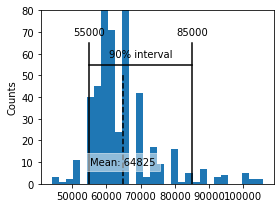

In [8]:
# confidence intervals
print('This is loan mean : ',loan_csv.mean())
# create a sample of 20 loan data

sample_20 = resample(loan_csv,n_samples=20,replace=False)
print('This is sample 20 mean : ',sample_20.mean())

results = []
for n in range(500):
    sample = resample(sample_20)
    results.append(sample.median())
results = pd.Series(results)

confidence_intervals = list(results.quantile([0.05,0.95]))
print('This is confidence intervals : ',confidence_intervals)
ax = results.plot.hist(bins=30,figsize=(4,3))
ax.plot(confidence_intervals,[55,55],color='black')
for x in confidence_intervals:
    ax.plot([x,x],[0,65],color='black')
    ax.text(x, 70, f'{x:.0f}', 
            horizontalalignment='center', verticalalignment='center')
ax.text(sum(confidence_intervals) / 2, 60, '90% interval',
        horizontalalignment='center', verticalalignment='center')

mean_income = results.mean()
ax.plot([mean_income,mean_income],[0,50],color='black',linestyle='--')
ax.text(mean_income, 10, f'Mean: {mean_income:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0,80)
ax.set_ylabel('Counts')
plt.tight_layout()
plt.show()

""" 
    firstly just (20) resample from the sample data without replacement and use quantile function to calculate confidence 
    intervals and crate plot and find mean finally combine to create final graph.
"""

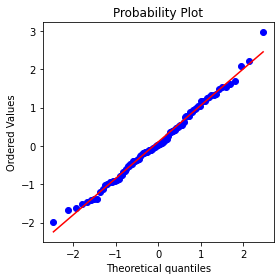

In [9]:
# normal distribution
# standard normal and qqplot
fig,ax = plt.subplots(figsize=(4,4))
normal_sample = stats.norm.rvs(size=100) 
#In scipy. stats. norm. rvs() the argument scale denotes standard deviation but in the below piece 
#of code sigma_list refers to an array.
stats.probplot(normal_sample,plot=ax)
"""
    Generates a probability plot of sample data against the quantiles of a specified theoretical distribution 
    (the normal distribution by default). probplot optionally 
    calculates a best-fit line for the data and plots the results using Matplotlib or a given plot function.
"""
plt.tight_layout()
plt.show()


In [10]:
# Binomial distribution
binom_pmf = stats.binom.pmf(2,n=5,p=0.1)
""" stats. binom. pmf() function is used to obtain the probability mass function 
for a certain value of r, n and p. We can obtain the distribution by passing all possible values of r(0 to n). """

print('Binom_pmf value : ',binom_pmf)

binom_cdf = stats.binom.cdf(2,n=5,p=0.1)
""" Python Scipy scipy. stats. binom() function calculates the binomial distribution of an experiment that has two possible 
outcomes success or failure . """

print('Binom_cdf value : ',binom_cdf)

Binom_pmf value :  0.07289999999999992
Binom_cdf value :  0.99144


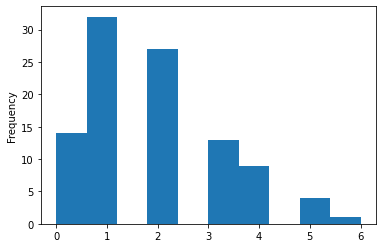

In [18]:
# poisson and related distribution

poisson_sample = stats.poisson.rvs(2,size=100)
""" A Poisson discrete random variable. Discrete random variables are defined from a standard form and may require some 
shape parameters to complete its specification. Any optional keyword parameters 
can be passed to the methods of the RV object as given below: Parameters : x : array_like. """

#print(poisson_sample)
pd.Series(poisson_sample).plot.hist()
plt.show()

# stats.expon.rvs documentation : https://het.as.utexas.edu/HET/Software/Scipy/generated/scipy.stats.expon.html

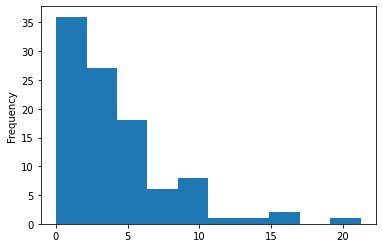

In [12]:
# Exponential distribution

expon_sample = stats.expon.rvs(scale=5,size=100)
#print(expon_sample)
pd.Series(expon_sample).plot.hist()
plt.show()

# stats.weibull_min.rvs documentation :https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.weibull_min.html

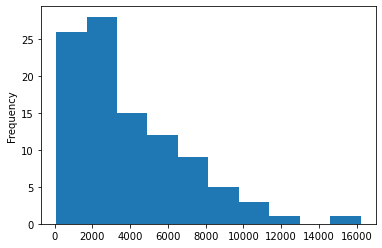

In [13]:
# weibull distribution
weibull_sample = stats.weibull_min.rvs(1.5,scale=5000,size=100)
pd.Series(weibull_sample).plot.hist()
plt.show()